#  3i005 - projet 3 - 2020dec
## Xinyu HUANG - gr1(3803966) Yifei SONG - gr1(3970712)

#  Chaines de Markov et épidémiologie :
   **<u>Propagation d’une épidémie dans une population</u>**
      
L’objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d’une épidémie dans une population. Votre rendu sera un notebook, il est attendu que les codes soient commentés et les résultats interprétés. Les packages random et matplotlib sont conseillés.



In [208]:
import random as rand
import matplotlib as mp
import matplotlib.pyplot as plt
SAIN=0
INFECTE=1
GUERI=2
dict_etat={0:'SAIN',1:'INFECTE',2:'GUERI'}

# Description du modèle 
Dans le modèle SIR , un individu est initialement sain S, peut devenir infecté I puis être guéri R. La probabilité pour un individu être dans un de ces 3 états au temps t, ne dépend que l’état dans lequel il est au temps t − 1.
Un individu dans l’état sain a une probabilité de 0.92 de rester sain et une probabilité de 0.08 de devenir infecté. Si l’individu est infecté, il peut le rester avec une probabilité de 0.93 et être guéri avec une probabilité de 0.07. S’il est dans l’état guéri, il reste dans cette état avec une probabilité de 1.

### Question 1
<u>Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états. Vérifiez que cette matrice est stochastique.</u>

Matrice de transition A:

|  |S | I | R |
| :--|:--:| :--:| --:|
|S   |0.92  | 0.08 |   0|
|I   | 0    | 0.93 |0.07|
|R   |0     |  0   |   1|

Cette matrice est bien stochastique car 
- S={S, I, R} fini
- À chaque état de n, Xn décrivant bien l'état du système à cet instant

In [574]:
#La creation de la matrice M
M=[[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1] ]

### Question 2
<u>Créez Π0 la distribution de probabilité initiale.</u>

**Reponse:**

Π0:

|S | I | R|
|:--| :--:| --:|
|0.9 |0.1  |0|

In [ ]:
Π0=[0.9, 0.1, 0]

#### Tirage aléatoire des états
Vous allez générer une séquence de taille T en utilisant cette chaîne de Markov. Pour générer une séquence aléatoire, choisissiez un état initial au hasard (en utilisant Π0); puis choisissez les états suivants en suivant les probabilités de transition (= la matrice de transition A).
Vous pouvez prendre T=50.

In [423]:
"""
En fixant T=50, on veut afficher une évolution d'un individu pendant cette épidémie
"""
T=50
cpt=0
val=rand.random()
if val<=Π0[0]: 
    etat=SAIN
else:
    etat=INFECTE
print("T:",cpt, "etat",dict_etat[etat])
while(cpt<50):
    val=rand.random()
    #print("val",val)
    if val<=M[etat][0]:
        etat=SAIN
    elif val<= M[etat][0]+M[etat][1]:
        #print(M[etat][0]+M[etat][1])
        etat=INFECTE
    else:
        etat=GUERI
    cpt+=1  
    print("T:", cpt, "etat",dict_etat[etat])


T: 0 etat INFECTE
T: 1 etat INFECTE
T: 2 etat INFECTE
T: 3 etat INFECTE
T: 4 etat GUERI
T: 5 etat GUERI
T: 6 etat GUERI
T: 7 etat GUERI
T: 8 etat GUERI
T: 9 etat GUERI
T: 10 etat GUERI
T: 11 etat GUERI
T: 12 etat GUERI
T: 13 etat GUERI
T: 14 etat GUERI
T: 15 etat GUERI
T: 16 etat GUERI
T: 17 etat GUERI
T: 18 etat GUERI
T: 19 etat GUERI
T: 20 etat GUERI
T: 21 etat GUERI
T: 22 etat GUERI
T: 23 etat GUERI
T: 24 etat GUERI
T: 25 etat GUERI
T: 26 etat GUERI
T: 27 etat GUERI
T: 28 etat GUERI
T: 29 etat GUERI
T: 30 etat GUERI
T: 31 etat GUERI
T: 32 etat GUERI
T: 33 etat GUERI
T: 34 etat GUERI
T: 35 etat GUERI
T: 36 etat GUERI
T: 37 etat GUERI
T: 38 etat GUERI
T: 39 etat GUERI
T: 40 etat GUERI
T: 41 etat GUERI
T: 42 etat GUERI
T: 43 etat GUERI
T: 44 etat GUERI
T: 45 etat GUERI
T: 46 etat GUERI
T: 47 etat GUERI
T: 48 etat GUERI
T: 49 etat GUERI
T: 50 etat GUERI


#### Modélisation d’une population
Vous avez généré une séquence d’état pour un individu. Maintenant vous allez générer un ensemble de séquence pour une population de 20000 individus. -Si c’est trop long vous pouvez prendre moins d’individus-.
#### Question 1
<u>A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l’évolution du nombre d’individus dans les trois états en fonction du temps.</u>



In [472]:
N=20000
T=150
"""
En fixant T=150, on veut afficher une évolution d'un individu pendant cette épidémie
Π: la distribution de probabilité initiale , print=0
return: une liste count=>nombre d'individu dans les 3 états
"""
def modelisation(Π, print=0):
    cpt=0
    i=0
    population=[0]*N
    count=[0]*3
    while i<N:
        val=rand.random()
        if val<=Π[0]: 
            population[i]=SAIN
            count[0]+=1
        elif val<=Π[0]+Π[1]:
            population[i]=INFECTE
            count[1]+=1
        else:
            population[i]=GUERI
            count[2]+=1
        i+=1
    if(print!=0):
        print("T:",cpt, "etat",dict_etat[population[cpt]], "Nombre de sain: ", count[0], "| Nombre de infecte: ", count[1], "| Nombre de guerie: ", count[2])
    while(cpt<T):
        count=[0]*3
        for i in range(N):
            val=rand.random()
            if val<=M[population[i]][0]:
                population[i]=SAIN
                count[0]+=1
            elif val<=M[population[i]][1]+M[population[i]][1]:
                population[i]=INFECTE
                count[1]+=1
            else:
                population[i]=GUERI
                count[2]+=1
        cpt+=1
        #if(print!=0):
        print("T:",cpt, "etat",dict_etat[population[cpt]], "Nombre de sain: ", count[0], "| Nombre de infecte: ", count[1], "| Nombre de guerie: ", count[2])
    return count

#### Question 2
<u>Quand t est grand, quel est la proportion d’individus sains, infectés et guéris ?</u>

**Reponse:**
    J'ai fait 10 tests pour un t de taille differrente , alors j'ai obtenu:

|  |S | I | R |S% | I% | R% |
|:--|:--:|:--:|:--:|:--:|:--:|--:|
|50  |294   | 44   |   19662|0.0147|0.0022|0.9831|
|100 | 5    | 1    |   19994| 0.00025|5e-05|0.9997|
|150 |0     |  0   |   20000| 0|0 | 100%|
|200 |0     |  0   |   20000| 0|0 | 100%|
|300 |0     |  0   |   20000| 0|0 | 100%|
|400 |0     |  0   |   20000| 0|0 | 100%|
|500 |0     |  0   |   20000| 0|0 | 100%|
|1000|0     |  0   |   20000| 0|0 | 100%|
|2000|0     |  0   |   20000| 0|0 | 100%|
|4000|0     |  0   |   20000| 0|0 | 100%|

Donc à partir de t=150, alors on a une très grande probabilité d'avoir tout le monde qui est d'état GUREIE

Il est donc plus intéressant d'étudier les valeurs de t<=150

In [452]:
"""
En fixant T=150, on veut afficher une évolution d'un individu pendant cette épidémie
Π: la distribution de probabilité initiale , print=0
return: une liste count=>[[nombre de sain pour N iterations], [nombre de infecte pour N iterations], [nombre de gueri pour N iterations]]
"""
def modelisation_affiche(M, Π,print=0):
    cpt=0
    i=0
    population=[0]*N
    count=[0]*3
    while i<N:
        val=rand.random()
        if val<=Π[0]: 
            population[i]=SAIN
            count[0]+=1
        elif val<=Π[1]+Π[0]:
            population[i]=INFECTE
            count[1]+=1
        else:
            population[i]=GUERI
            count[2]+=1
        i+=1
    if(print!=0):
        print("T:",cpt, "etat",dict_etat[population[cpt]], "Nombre de sain: ", count[0], "| Nombre de infecte: ", count[1], "| Nombre de guerie: ", count[2])
    x=[[0]*(T+1),[0]*(T+1), [0]*(T+1)]
    x[0][cpt], x[1][cpt], x[2][cpt]=count[0], count[1], count[2]
    cpt+=1
    while(cpt<=T):
        count=[0,0,0]
        for i in range(N):
            val=rand.random()
            somme=M[population[i]][0]+M[population[i]][1]
            if val<=M[population[i]][0] and M[population[i]][0]!=0:
                population[i]=SAIN
                count[0]+=1
            elif(val<= somme and somme!=0):
                population[i]=INFECTE
                count[1]+=1
            else:
                population[i]=GUERI
                count[2]+=1
        x[0][cpt], x[1][cpt], x[2][cpt] =count[0], count[1], count[2]
        cpt+=1
        if(print!=0):
            print("T:",cpt, "etat",dict_etat[population[cpt]], "Nombre de sain: ", count[0], "| Nombre de infecte: ", count[1], "| Nombre de guerie: ", count[2])
    
    return (x[0], x[1], x[2])

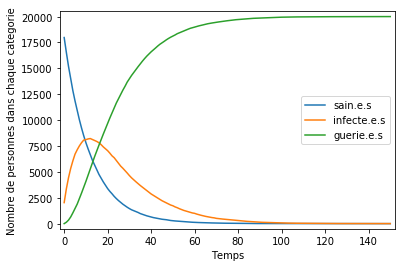

In [475]:
"""
affichage de l'exo 1
"""
s, i, g=(modelisation_affiche(M,Π0))[0], (modelisation_affiche(M, Π0))[1], (modelisation_affiche(M, Π0))[2]
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.axis([-2, 152, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.show()


### Pic de l’épidémie
#### Question1 
<u>Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?</u>

**Reponse:**
Selon la figure en-dessus, presque 8500 d'individus sont infectés et le pic se produit au t=11

### Longueur de l'infection
#### Question1 
<u>À partir des simulations, estimer la longueur moyenne d’une séquence de I</u>

In [446]:
NB=20000
Val_max=150
"""
En fixant NB=20000, Val_max=150, on veut obtenir le longueur moyenne d’une séquence de I
Π: la distribution de probabilité initiale 
return: le longueur moyenne d’une séquence de I
"""
def longueur_moyenne(Π):
    liste=[0]*NB
    val_liste=[0]*NB
    result=[]
    for i in range(NB):
        val=rand.random()
        if val<=Π[0]: 
            liste[i]=SAIN
        elif val<=Π[0]+Π[1]:
            liste[i]=INFECTE
        else:
            liste[i]=GUERI
    i=0
    for elem in liste:
        v=elem
        while v!=GUERI:
            val=rand.random()
            somme=M[v][0]+M[v][1]
            if val<=M[v][0] and M[v][0]!=0:
                v=SAIN
            elif(val<= somme and somme!=0):
                v=INFECTE 
                val_liste[i]+=1
            else:
                v=GUERI
                result.append(val_liste.pop(i))
                liste.pop(i)               
        i+=1
    return result
print(sum(longueur_moyenne(Π0))/len(longueur_moyenne(Π0)))

14.2156


**Reponse**:
Donc la longueur moyenne d'une séquence de I est 14.

#### Question2 
<u>Calculer théoriquement la longueur d’une séquence de I en fonction de la probabilité de rester
infecté, si on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique).</u>

In [447]:
p=0.93
"""
En utilisant l’espérance de la loi géométrique, on veut obtenir 
la longueur d’une séquence de I en fonction de la probabilité de rester infecté
"""
def esperance():
    somme=0
    cpt=0
    while(cpt<150):
        somme+=p**cpt
        cpt+=1
    print(somme)
esperance()

14.28544677311386


**Reponse**:

Ici, on a posé que t_max=150
Donc à la fin qu'on obtient espérance=14.28544677311386 qui est très proche de 14

# Modèle ergodique
Nous allons maintenant considérer un second modèle, les individus guéris peuvent redevenir sains avec une probabilité de 0.04. Ils-elles peuvent perdre leur immunité face à la maladie.

#### Question1 
<u>Créez la nouvelle matrice de transition, et les nouvelles simulations, comment la population évolue-
t-elle si un individu guérit peut redevenir infecté ?</u>

Matrice de transition:

|  |S | I | R |
| :--|:--:| :--:| --:|
|S   |0.92  | 0.08 |   0|
|I   | 0    | 0.93 |0.07|
|R   |0.04     |  0   |   0.96|

In [448]:
#La creation de la matrice M
M2=[[0.92, 0.08, 0], [0, 0.93, 0.07], [0.04, 0, 0.96] ]

# La simulation d'un seul d'individu
T=50
cpt=0
val=rand.random()
if val<=Π0[0]: 
    etat=SAIN
else:
    etat=INFECTE
print("T:",cpt, "etat",dict_etat[etat])
while(cpt<50):
    val=rand.random()
    if val<=M2[etat][0]:
        etat=SAIN
    elif val<= M2[etat][0]+M2[etat][1]:
        etat=INFECTE
    else:
        etat=GUERI
    cpt+=1  
    print("T:", cpt, "etat",dict_etat[etat])

T: 0 etat SAIN
T: 1 etat SAIN
T: 2 etat SAIN
T: 3 etat SAIN
T: 4 etat SAIN
T: 5 etat INFECTE
T: 6 etat GUERI
T: 7 etat GUERI
T: 8 etat GUERI
T: 9 etat GUERI
T: 10 etat GUERI
T: 11 etat GUERI
T: 12 etat GUERI
T: 13 etat GUERI
T: 14 etat GUERI
T: 15 etat GUERI
T: 16 etat GUERI
T: 17 etat GUERI
T: 18 etat GUERI
T: 19 etat GUERI
T: 20 etat GUERI
T: 21 etat GUERI
T: 22 etat SAIN
T: 23 etat SAIN
T: 24 etat SAIN
T: 25 etat SAIN
T: 26 etat SAIN
T: 27 etat SAIN
T: 28 etat SAIN
T: 29 etat SAIN
T: 30 etat SAIN
T: 31 etat SAIN
T: 32 etat SAIN
T: 33 etat SAIN
T: 34 etat SAIN
T: 35 etat SAIN
T: 36 etat SAIN
T: 37 etat SAIN
T: 38 etat SAIN
T: 39 etat INFECTE
T: 40 etat INFECTE
T: 41 etat INFECTE
T: 42 etat INFECTE
T: 43 etat INFECTE
T: 44 etat INFECTE
T: 45 etat INFECTE
T: 46 etat INFECTE
T: 47 etat INFECTE
T: 48 etat INFECTE
T: 49 etat INFECTE
T: 50 etat INFECTE


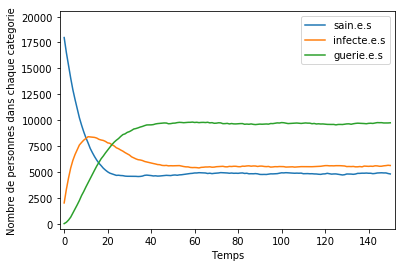

In [449]:
# La simulation avec 20000 échantillons dans ce cas
T=150
s, i, g=(modelisation_affiche(M2, Π0))[0], (modelisation_affiche(M2, Π0))[1], (modelisation_affiche(M2, Π0))[2]
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.axis([-2, 152, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.show()

Alors pour un échantillon de taille 20000 avec t_max=150 
On obtient une figure en dessus, avec 

(les calculs se font selon la figure)
- Un pic pour lequel presque 8500 d'individus sont infectés et le pic se produit au t=11
- Pout t assez grand, il existe un équilibre pour tous les trois types d'individus. Visuellement, on a
    - Pourcent_Guerie=10000/20000=50%
    - Pourcent_Infect=5500/20000=27.5%
    - Pourcent_Sain=4500/20000=22.5%

#### Question2
<u>Refaire les simulations avec une autre distribution de probabilité initiale, par exemple si au temps t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez vos observations.</u>

Je vais explorer 2 cas, soitent
- Au début de l'épidémie Π1=[0.99, 0.01, 0]
- Au cours de l'épidémie Π2=[0.50, 0.275, 0.225]

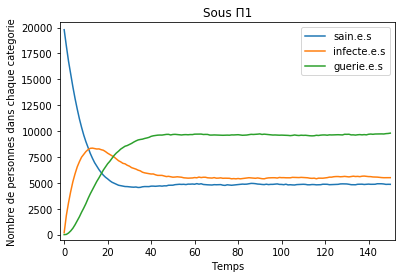

In [454]:
#cas 1:Au début de l'épidémie Π1=[0.99, 0.01, 0]
Π1=[0.99, 0.01, 0]
T=150
s, i, g=(modelisation_affiche(M2, Π1))[0], (modelisation_affiche(M2, Π1))[1], (modelisation_affiche(M2, Π1))[2]
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.axis([-2, 152, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Sous Π1")
plt.show()

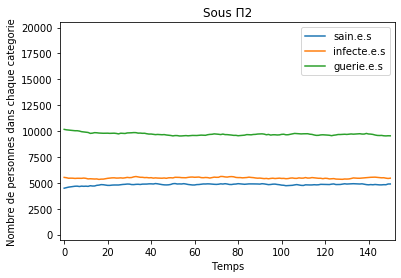

In [455]:
#cas 2:Au cours de l'épidémie Π2=[0.50, 0.275, 0.225]
Π2=[0.225, 0.275, 0.50]
T=150
s, i, g=(modelisation_affiche(M2, Π2))[0], (modelisation_affiche(M2, Π2))[1], (modelisation_affiche(M2, Π2))[2]
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.axis([-2, 152, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Sous Π2")
plt.show()

**COMMENTATION**

La distribution de probabilité intiale n'apporte pas de changement pour la convergence

Donc les nombres de personnes convergent vers les même valeurs pour les probabilités intiales différent

Pour toujours, avec t assez grand:
- Pourcent_Sain=22.5%
- Pourcent_Infect=27.5%
- Pourcent_Guerie=50%

#### Question3 
<u>Quels est la nature des états de cette chaine de Markov ? Est-elle périodique ? Est-elle irréductible ?</u>
La chaîne est
- apériodique car il existe au moins un noeud possédant un cycle sur un noeud 
- irréductible car un seul composante connexe
- finie
- égordique selon les proprétés précédentes

Donc les états sont tous récurrents positifs

#### Question4 
<u>Calculer la distribution de probabilité stationnaire à partir de la matrice de transition et comparez
ce résultat avec les simulations pour t assez grand.</u>

In [471]:
import numpy as np
"""
En utilisant la propriete de la distribution de probabilité stationnaire, obtenir un
pi=>pi initial, p=> la matrice, precision=>precision
return pi*
"""
def dp_stationnaire(pi, p, precision):
    val=pi
    while True:
        val_new=np.matmul(val,p)
        for i in range(len(val)):
            if(abs(val[i]-val_new[i])>precision):
                bool=0
                break
            else:
                bool=1
        val=val_new
        if bool==1:
            break
    return val_new

print(dp_stationnaire(Π0, M2, 0.000001))

[0.24138609 0.27586241 0.4827515 ]


On a donc obtenu comme 

Pi*=[0.24138609 0.27586241 0.4827515 ]

Ce qui resemble beaucoup au notre résultat obtenu selon la figure, soit:
- Pourcent_Sain=22.5%
- Pourcent_Infect=27.5%
- Pourcent_Guerie=50%

# Modification du modèle : confinement


Cette question est indépendant de la question 2. On peut imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de devenir infecté est plus faible. Nous allons considérer qu’en période de distanciation la probabilité de devenir infecté quand on est un individu sain est de 0.02.

#### Question1
<u>Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Modifiez le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, et comparer les simulations au premier modèle.</u>

Matrice de transition A2:

|  |S | I | R |
| :--|:--:| :--:| --:|
|S   |0.98  | 0.02 |   0|
|I   | 0    | 0.93 |0.07|
|R   |0     |  0   |   1|

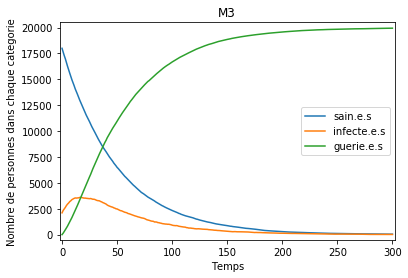

In [483]:
#La creation de la matrice M3
M3=[[0.98, 0.02, 0], [0, 0.93, 0.07], [0, 0, 1] ]
# L'affichage dans ce cas
T=300
s, i, g=(modelisation_affiche(M3, Π0))[0], (modelisation_affiche(M3, Π0))[1], (modelisation_affiche(M3, Π0))[2]
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.axis([-2, 302, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("M3")
plt.show()

**Comparation avec le premier modèle**

|Critère|M1 | M3 |  
| :--|:--:| --:|
|Temps de convergence   |150  |   300|
|Max_pic| 8500    |3500|


**Conclusion**:

On a remarqué que malgré M3 prend plus de temps pour la convergence,

le nombre de personne au pic de l'épidémie a considérablement diminué, 

ce qui est très important dans notre vie réel car on aura plus de ressource 

médical pour distribuer aux personnes infectés.

#### Question2
<u>Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.</u>
- Commencer les simulations avec la matrice A. On peut considérer qu’au temps initial tous les
individus sont sains.
- Quand il y a 30% d’individus infectés dans la population, nous passons en période de distan-
ciation, continuer les simulations avec la seconde matrice de transition A2.
- Le nombre d’individus infectés va décroître.Quand il y a moins de 15% d’infectés,le confinement
est levé ; on continue les simulations avec la première matrice A.


In [562]:
M=[[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1] ]
M3=[[0.98, 0.02, 0], [0, 0.93, 0.07], [0, 0, 1] ]
"""
Etudier le technique d'alterner entre les périodes de non distanciation et de distanciation
return (T,[nombre de sain pour N iterations], [nombre de infecte pour N iterations], [nombre de gueri pour N iterations]] )
"""
def alterner_nd_d():
    population=[0]*NB
    cpt=0
    x=[[0],[0],[0]]
    x[0][cpt], x[1][cpt], x[2][cpt]=NB, 0, 0
    count=[0,0,0]
    while(count[2]<NB):
        pourcent_inf=count[1]/NB
        count=[0,0,0] # [sain,infecte, guerie]
        #print(pourcent_inf)
        if pourcent_inf<0.15:
            # print("hi")
            m=M
        if pourcent_inf>=0.30:
            #print("hi")
            m=M3
        for i in range(len(population)):
            val=rand.random()
            somme=m[population[i]][0]+m[population[i]][1]
            if val<=m[population[i]][0]:
                population[i]=SAIN
                count[0]+=1
            elif val<= somme:
                population[i]=INFECTE
                count[1]+=1
            else:
                population[i]=GUERI
                count[2]+=1
        x[0].append(count[0]) 
        x[1].append(count[1])
        x[2].append(count[2])
        cpt+=1   
    return (len(x[0]),x[0], x[1], x[2])
#print(alterner_nd_d())


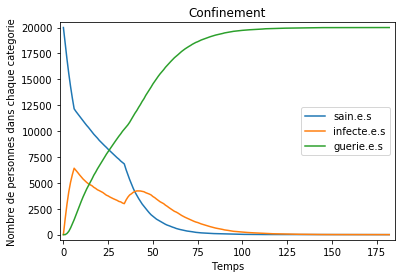

In [557]:
r=alterner_nd_d()
T=r[0]
s, i, g= r[1], r[2], r[3]
#print(T, len(s))
#print(s)
plt.plot([x for x in range(0,T)], s , label="sain.e.s")
plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Confinement")
plt.show()



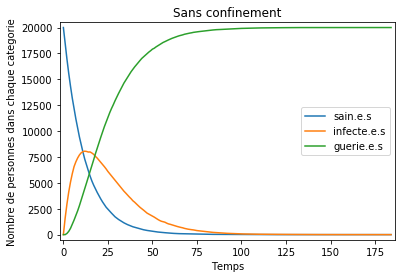

In [533]:
Π4=[1,0,0]
s, i, g=(modelisation_affiche(M,Π4))[0], (modelisation_affiche(M, Π4))[1], (modelisation_affiche(M, Π4))[2]
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Sans confinement")
plt.show()

**Conclusion**

On peut très bien remarquer que avec le technique alterner entre les périodes de non distanciation et de distanciation, 

On a remarqué que le nombre de personne au pic de l'épidémie a considérablement diminué, ce qui est très important 

dans notre vie réel car on aura plus de ressource médical pour distribuer aux personnes infectés. 

Ce technique est plus favorable pour l'économie et les ressource des hopitaux.

# Optionnel

Vous pouvez maintenant modifier le(s) modèle(s) pour étudier différents cas de figure :
#### Question1
<u>
Vous pouvez modifier
    
- la taille de la population ;
- la distribution de probabilité initiale ;
- les probabilité de transition 

pour voir comment cela va affecter la propagation de l’épidémie.</u>

**REPONSE**:
On va seulement étudier les deux cas:

- la taille de la population ;
- les probabilité de transition 

car l'autre cas est déja traité précédenment

**La taille de la population**
On veut étudier 4 valeur:
- valeur beaucoup plus petite que 20000 --- 1000
- valeur aprroche de 20000 --- 10000
- valeur un peu plus grand que 200000 --- 30000
- valeur beaucoup plus grand que 20000 --- 100000

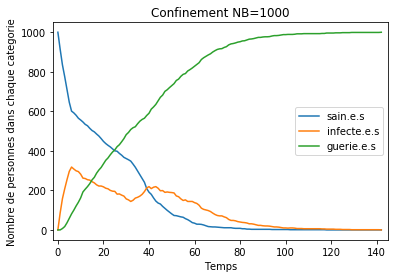

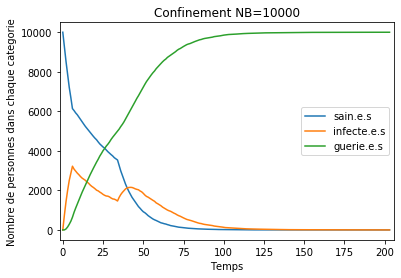

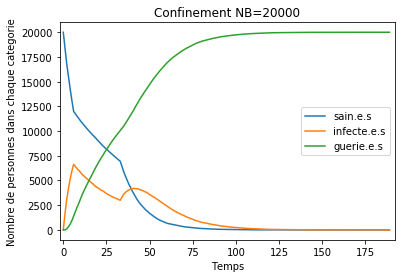

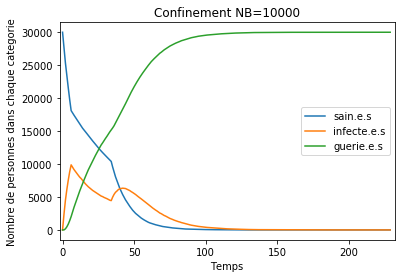

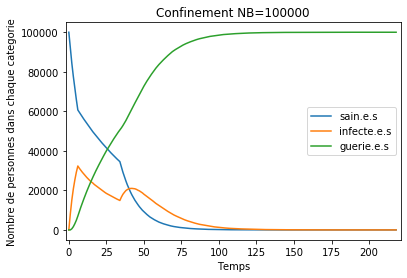

In [570]:
NB=1000
r=alterner_nd_d()
T=r[0]
s, i, g= r[1], r[2], r[3]
plt.plot([x for x in range(0,T)], s , label="sain.e.s")
plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -0.05*NB, NB+0.05*NB])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Confinement NB=1000")
plt.show()

NB=10000
r=alterner_nd_d()
T=r[0]
s, i, g= r[1], r[2], r[3]
plt.plot([x for x in range(0,T)], s , label="sain.e.s")
plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -0.05*NB, NB+0.05*NB])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Confinement NB=10000")
plt.show()

NB=20000
r=alterner_nd_d()
T=r[0]
s, i, g= r[1], r[2], r[3]
plt.plot([x for x in range(0,T)], s , label="sain.e.s")
plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -0.05*NB, NB+0.05*NB])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Confinement NB=20000")
plt.show()

NB=30000
r=alterner_nd_d()
T=r[0]
s, i, g= r[1], r[2], r[3]
plt.plot([x for x in range(0,T)], s , label="sain.e.s")
plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -0.05*NB, NB+0.05*NB])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Confinement NB=10000")
plt.show()

NB=100000
r=alterner_nd_d()
T=r[0]
s, i, g= r[1], r[2], r[3]
plt.plot([x for x in range(0,T)], s , label="sain.e.s")
plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
plt.axis([-2, T+2, -0.05*NB, NB+0.05*NB])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Confinement NB=100000")
plt.show()

NB=20000

**CONCLUSION**

On peut remarquer que tous les cinq figures se ressemblent et on obtient une figure assez précise pour NB=10000

Donc si on nous demande de l'exécution avec vitesse, il est préférable de choisir NB=10000

(Ou bien continuer à tester les valeurs entre 1000 et 10000 pour l'optimisation)

**Les probabilité de transition**

Pour les probabilité de transition, on va aussi basé sur Q3 en véfifiant les trois cas:
- probabilité de propagation élevé
- probabilité de guérir élevé
- les deux probabilités sont élévés en même temps

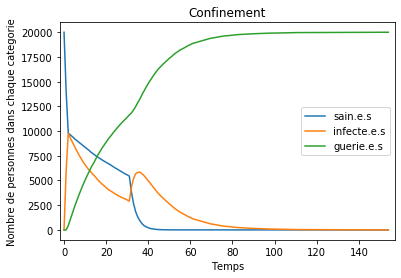

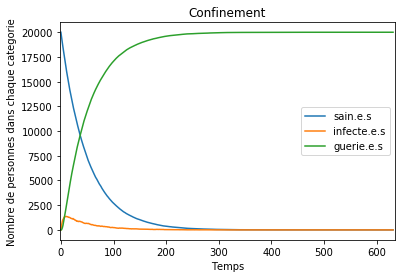

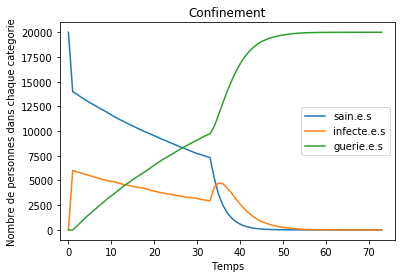

In [576]:
Mp=[[0.70, 0.30, 0], [0, 0.93, 0.07], [0, 0, 1] ]
Mg=[[0.98, 0.02, 0], [0, 0.75, 0.25], [0, 0, 1] ]
Mpg=[[0.70, 0.30, 0], [0, 0.75, 0.25], [0, 0, 1] ]
liste=[Mp, Mg, Mpg]
M_backup=M
for i in range(3):
    M=liste[i]
    r=alterner_nd_d()
    T=r[0]
    s, i, g= r[1], r[2], r[3]
    plt.plot([x for x in range(0,T)], s , label="sain.e.s")
    plt.plot([x for x in range(0,T)], i , label = "infecte.e.s")
    plt.plot([x for x in range(0,T)], g, label = "guerie.e.s")
    plt.axis([-2, T+2, -0.05*NB, NB+0.05*NB])
    plt.xlabel('Temps')
    plt.ylabel('Nombre de personnes dans chaque categorie')
    plt.legend()
    plt.title("Confinement")
    plt.show()

**CONCLUSION**

On peut remarquer qu'il y a des grande variations au niveau de pic et durée
- Pour une épidémie avec une probabilité de propagation élevé, son pic est plus élevé que le cas "normal"(Le cas par défaut)<br> Ça durée n'a pas beaucoup bougé par rapport au cas "normal"
- Pour une épidémie avec une probabilité de guérir élevé, son pic est très très bas et en revanche la durée est très longue, 600 par rapport au 150 pour le cas "normal"
- Pour une épidémie avec les deux probabilités élévés en même temps, son pic n'est pas très élevé est ça durée aussi qui est courte

#### Question2
<u>Quelle remarque critique pouvez faire sur le modèle SIR? Proposez-vous des améliorations?</u>

**REPONSE**
- On n'a pas considéré l'exsistence des Super-épandeurs ou  la mutation du virus

- on n'a pas considéré la déplacement des personnes

- On n'a pas considéré la possibilité de décéder pour les personnes infectées.

On peut donc ajouter un état décède en ajoutant une liste [0,0,0,1] dans la matrice de transition, on fait la modification à partir de Q1:

Nombre de personne decede: 75


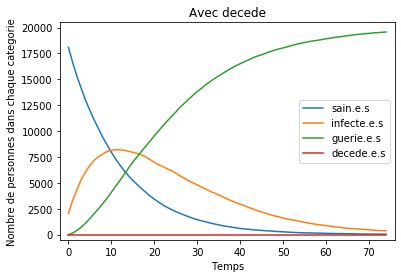

In [577]:
M=M_backup
DECEDE=4
M4=[[0.92, 0.08, 0, 0], [0, 0.90, 0.07, 0.03 ], [0, 0, 1, 0] ]
Π5=[0.9, 0.1, 0, 0]
#print(Π5)
def modelisation_affiche_bis(M, Π,print=0):
    cpt=0
    i=0
    population=[0]*N
    count=[0]*4
    while i<N:
        val=rand.random()
        if val<=Π[0]: 
            population[i]=SAIN
            count[0]+=1
        elif val<=Π[1]+Π[0]:
            population[i]=INFECTE
            count[1]+=1
        elif val<=Π[2]+Π[1]+Π[0]:
            population[i]=GUERI
            count[2]+=1
        else:
            population[i]=DECEDE
            count[3]+=1
        i+=1
    if(print!=0):
        print("T:",cpt, "etat",dict_etat[population[cpt]], "Nombre de sain: ", count[0], "| Nombre de infecte: ", count[1], "| Nombre de guerie: ", count[2])
    x=[[0]*(T+1),[0]*(T+1), [0]*(T+1), [0]*(T+1)]
    x[0][cpt], x[1][cpt], x[2][cpt], x[3][cpt]=count[0], count[1], count[2], count[3]
    cpt+=1
    while(cpt<=T):
        #print(cpt)
        count=[0,0,0,0]
        for i in range(N):
            val=rand.random()
            #print(val)
            somme=M[population[i]][0]+M[population[i]][1]
            if val<=M[population[i]][0] :
                population[i]=SAIN
                count[0]+=1
            elif val<= somme :
                population[i]=INFECTE
                count[1]+=1
            elif  val<=somme+M[population[i]][2]:
                population[i]=GUERI
                count[2]+=1
            else :
                population[i]=DECEDE
                count[3]+=1
        x[0][cpt], x[1][cpt], x[2][cpt], x[3][cpt] =count[0], count[1], count[2], count[3]
        cpt+=1
        if(print!=0):
            print("T:",cpt, "etat",dict_etat[population[cpt]], "Nombre de sain: ", count[0], "| Nombre de infecte: ", count[1], "| Nombre de guerie: ", count[2])
    
    return (x[0], x[1], x[2], x[3])

s, i, g, d=(modelisation_affiche_bis(M,Π5))[0], (modelisation_affiche_bis(M, Π5))[1], (modelisation_affiche_bis(M, Π5))[2], (modelisation_affiche_bis(M, Π5))[3]
print("Nombre de personne decede:",len(d))
plt.plot([x for x in range(0,T+1)], s , label="sain.e.s")
plt.plot([x for x in range(0,T+1)], i , label = "infecte.e.s")
plt.plot([x for x in range(0,T+1)], g, label = "guerie.e.s")
plt.plot([x for x in range(0,T+1)], d, label = "decede.e.s")
plt.axis([-2, T+2, -500, 20500])
plt.xlabel('Temps')
plt.ylabel('Nombre de personnes dans chaque categorie')
plt.legend()
plt.title("Avec decede")
plt.show()